In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import geopandas as gpd
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
faults = pd.read_csv('../data/J1939Faults.csv', low_memory = False )
diagnostics = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv', low_memory = False)
service_fault_code = pd.read_excel('../data/Service Fault Codes_1_0_0_167.xlsx')

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
faults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [4]:
faults.columns

Index(['RecordID', 'ESS_Id', 'EventTimeStamp', 'eventDescription',
       'actionDescription', 'ecuSoftwareVersion', 'ecuSerialNumber',
       'ecuModel', 'ecuMake', 'ecuSource', 'spn', 'fmi', 'active',
       'activeTransitionCount', 'faultValue', 'EquipmentID', 'MCTNumber',
       'Latitude', 'Longitude', 'LocationTimeStamp'],
      dtype='object')

In [5]:
faults.dtypes 

RecordID                   int64
ESS_Id                     int64
EventTimeStamp            object
eventDescription          object
actionDescription        float64
ecuSoftwareVersion        object
ecuSerialNumber           object
ecuModel                  object
ecuMake                   object
ecuSource                  int64
spn                        int64
fmi                        int64
active                      bool
activeTransitionCount      int64
faultValue               float64
EquipmentID               object
MCTNumber                  int64
Latitude                 float64
Longitude                float64
LocationTimeStamp         object
dtype: object

In [6]:
faults['EventTimeStamp'] = pd.to_datetime(faults['EventTimeStamp'])

In [7]:
faults['EventTimeStamp'].dt.year.unique()

array([2015, 2010, 2011, 2009, 2002, 2016, 2017, 2018, 2019, 2026, 2000,
       2020])

In [8]:
faults['EventTimeStamp'].dt.year.value_counts().sort_values()

2002         1
2026         3
2009        24
2010        58
2000       219
2011       244
2020     17188
2019    112075
2018    144510
2017    254851
2015    325779
2016    332383
Name: EventTimeStamp, dtype: int64

In [9]:
codes = faults['spn'].unique()

In [10]:
codes

array([   111,    629,   1807,   4364,     97,   1067,   5444,   5396,
           96,    829,    596,    929,  50353,      0,   1569,    102,
         5246,   1068,    611,    791,    907,    793,    100,   2863,
          627,    790,    789, 523531,    101,    639,    411,     91,
         3226,    905,   3821,   2791,    614,    630,   5848,   3482,
          157,   3936,    792,   3363,   3031,   3610,   3216,   3480,
         3246,    190,    800,   1761,    105,   5743,   5851,   3251,
         3556,    103,    612,    797,   1045, 523530,   5319,   3509,
          810,    802,    801,   1209,   3058,   3217,    651,   4334,
          807,   3362,    248,   3513,   1059,    168,   1231,    641,
          563,   4794,    811,     81,   5397,    803,   2659,   3064,
          188,   5491,   3364,   4363,   4094,   1808,   3720,    444,
         3361,   5745, 523543,   3360,   4346,   4376,   4340,   4342,
         3060,   4344,   3242,   4096,    862,   1483,    917,    184,
      

In [11]:
faults['spn'].nunique()

450

In [12]:
faults['fmi'].unique()

array([17, 12,  2, 15,  1,  3, 31,  9,  0, 14, 19, 18,  7,  4, 16, 11, 13,
       10,  6, 20,  5,  8, 21, 23, 29, 22])

In [13]:
faults['fmi'].nunique()

26

In [14]:
faults['fmi'].value_counts()

17    326553
9     288893
3     188631
2      82334
18     53602
31     39881
4      39734
0      27577
7      23249
1      20887
15     20739
14     12699
12     12233
5       9683
16      9242
10      7437
8       5741
19      5733
20      4440
11      3847
13      2634
6       1027
23       396
21       131
29         8
22         4
Name: fmi, dtype: int64

In [15]:
faults['spn'].value_counts()

111      365489
929      256541
96        90041
829       87788
639       41062
          ...  
46262         1
54478         1
677           1
56503         1
6327          1
Name: spn, Length: 450, dtype: int64

In [16]:
diagnostics

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [17]:
diagnostics.columns

Index(['Id', 'Name', 'Value', 'FaultId'], dtype='object')

In [18]:
diagnostics.dtypes 

Id          int64
Name       object
Value      object
FaultId     int64
dtype: object

In [19]:
diagnostics['Name'].nunique()

24

In [20]:
diagnostics['Name'].unique()

array(['IgnStatus', 'EngineOilPressure', 'EngineOilTemperature',
       'TurboBoostPressure', 'EngineLoad', 'AcceleratorPedal',
       'IntakeManifoldTemperature', 'FuelRate', 'FuelLtd', 'EngineRpm',
       'LampStatus', 'BarometricPressure', 'FuelLevel', 'Speed',
       'EngineTimeLtd', 'CruiseControlSetSpeed', 'CruiseControlActive',
       'EngineCoolantTemperature', 'ParkingBrake',
       'SwitchedBatteryVoltage', 'DistanceLtd', 'Throttle',
       'FuelTemperature', 'ServiceDistance'], dtype=object)

In [21]:
service_fault_code 


,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,Y,9996,167,Not Mapped,155,0,11,524286,31,Not Mapped,Amber,Warning,Reserved for temporary use - Condition Exists,NaN
7120,Y,9997,167,Not Mapped,155,0,11,524286,31,Not Mapped,Amber,Warning,Reserved for temporary use - Condition Exists,NaN
7121,Y,9998,167,Not Mapped,155,0,11,524286,31,Not Mapped,Amber,Warning,Reserved for temporary use - Condition Exists,NaN
7122,Y,9999,167,Not Mapped,155,0,11,524286,31,Not Mapped,Amber,Warning,Reserved for temporary use - Condition Exists,NaN


Excluding the observation in 2 mile radius from the service centre

36.0666667, -86.4347222 = 193 Aldi Blvd, Mount Juliet, TN 37122, United States
35.5883333, -86.4438888 = 119–121 Eady Rd, Shelbyville, TN 37160, United States¶
36.1950, -83.174722 = 5754 Fish Hatchery Rd, Russellville, TN 37860, United States

In [22]:
# Define the service locations
service_locations = [(36.0666667, -86.4347222), (35.5883333, -86.4438888), (36.1950, -83.174722)]

# Filter out faults occurring within 1 mile of service locations
for loc in service_locations:
    lat_mile = 2/69 # Convert 1 mile to degrees of latitude
    lon_mile =  1/(69 * np.cos(np.radians(loc[0]))) * 2 # Convert 2 mile to degrees of longitude at the given latitude
    faults = faults[(np.abs(faults['Latitude'] - loc[0]) > lat_mile) | (np.abs(faults['Longitude'] - loc[1]) > lon_mile)]
    
# Remove rows with Equipment ID > 5
faults = faults[faults['EquipmentID'].str.len() <= 5]
faults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [23]:
faults['spn'].value_counts()

111      343651
929      227522
96        82328
829       81781
639       31354
          ...  
1073          1
54478         1
46262         1
37265         1
65287         1
Name: spn, Length: 420, dtype: int64

In [24]:
faults['fmi'].nunique()


26

In [25]:
faults['spn'].nunique()


420

In [26]:
codes_away = faults['spn'].unique()

In [27]:
# to check codes only occring closer to service locations
def compare_arrays(arr1, arr2):
    non_matching = []
    for element in arr1:
        if element not in arr2:
            non_matching.append(element)
    for element in arr2:
        if element not in arr1:
            non_matching.append(element)
    return non_matching

arr1 = codes
arr2 = codes_away
non_matching = compare_arrays(arr1, arr2)

In [28]:
non_matching

[6327,
 2061,
 520416,
 3327,
 5097,
 1265,
 815,
 521,
 936,
 942,
 935,
 2622,
 943,
 707,
 703,
 706,
 708,
 702,
 704,
 701,
 898,
 1388,
 90,
 520321,
 8484,
 3828,
 1846,
 29,
 117,
 5842]

In [29]:
len(non_matching)

30

In [30]:
service_fault_code [service_fault_code['SPN'].isin(non_matching)]


,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
35,Y,149,167,29,Not Mapped,Not Mapped,2,29,2,Not Mapped,Amber,Warning,"Accelerator Pedal Position 2 - Data Erratic, I...",Remote Accelerator Pedal or Lever Idle Validat...
90,Y,223,167,Not Mapped,85,128,4,1265,4,Not Mapped,Amber,Warning,Engine Oil Burn Valve Solenoid Driver Circuit ...,Low signal voltage detected at the oil burn so...
91,Y,224,167,Not Mapped,85,128,3,1265,3,Not Mapped,Amber,Warning,Engine Oil Burn Valve Solenoid Driver Circuit ...,High signal voltage detected at the oil burn s...
150,Y,296,167,443,Not Mapped,Not Mapped,14,1388,14,Not Mapped,Red,Stop / Shutdown,Auxiliary Pressure Sensor Input 2 - Special In...,Un-isolated fault has occurred in the auxiliar...
151,Y,297,167,443,Not Mapped,Not Mapped,3,1388,3,Not Mapped,Amber,Warning,Auxiliary Pressure Sensor Input 2 Circuit - Vo...,High signal voltage has been detected at the A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,Y,5765,167,Not Mapped,Not Mapped,Not Mapped,3,6327,3,Not Mapped,Amber,Warning,Aftertreatment 1 Diesel Exhaust Fluid Dosing V...,NaN
4025,Y,5766,167,Not Mapped,Not Mapped,Not Mapped,4,6327,4,Not Mapped,Amber,Warning,Aftertreatment 1 Diesel Exhaust Fluid Dosing V...,NaN
4608,Y,6584,167,Not Mapped,Not Mapped,Not Mapped,14,1388,14,Not Mapped,Amber,Warning,Auxiliary Pressure Sensor Input 2 - Special In...,NaN
4625,Y,6613,167,Not Mapped,Not Mapped,Not Mapped,14,5842,14,Not Mapped,Amber,Warning,SCR Monitoring System Malfunction - Special In...,NaN


In [31]:
diagnostics


,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
...,...,...,...,...
12821621,12864020,EngineCoolantTemperature,181.4,1248457
12821622,12864021,ParkingBrake,False,1248457
12821623,12864022,SwitchedBatteryVoltage,14.1,1248457
12821624,12864023,DistanceLtd,28606.65625,1248457


In [32]:
faults['fmi'].value_counts()

17    308832
9     248152
3     171631
2      67238
18     48194
31     36461
4      29924
0      25852
7      20266
15     18518
1      17836
12     10400
14      9980
16      7311
5       7197
10      5364
19      4304
20      3938
8       3707
11      2997
13      1656
6        948
23       377
21       117
29         8
22         4
Name: fmi, dtype: int64

Need to pivot the diagnostics dataframe prior to merging with fault to avoid getting multiple columns for same faultID

In [33]:
# pivot the diagnostics dataframe
wide_diag = diagnostics.pivot(index='FaultId', columns='Name', values='Value')
wide_diag

Name,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
FaultId,,,,,,,,,,,,,,,,,,,,,,,,
1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96


In [34]:

# Merge fault and diagnostics dataframe
fault_diag = pd.merge(left = faults,
         right = wide_diag,
         left_on = 'RecordID',
         right_on = 'FaultId'
        )
fault_diag

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051207,1248454,123904424,2020-03-06 14:00:26,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1051208,1248455,123905139,2020-03-06 14:04:23,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1051210,1248457,123906113,2020-03-06 14:14:13,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,863.25,586.75,23.6,4042.49282573,0,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [35]:
fault_diag['EventTimeStamp'].dt.year.unique()

array([2015, 2010, 2009, 2011, 2016, 2017, 2018, 2019, 2000, 2020])

In [36]:

# Filter out rows where year is 2010 or 2011, and keep the rest
fault_diag= fault_diag[~fault_diag['EventTimeStamp'].dt.year.isin([2000, 2009, 2010, 2011])]


In [37]:
fault_diag['EquipmentID'].nunique()

1043

In [38]:
fault_diag[fault_diag['spn'] == 5246]['EquipmentID'].nunique() 
# There are 191 equipment with spn/fault code 5246

190

In [39]:
fault_diag[(fault_diag['spn'] == 1569) & (fault_diag['fmi'] == 31)]['EquipmentID'].nunique() 

491

In [40]:
# creating list of equipment with partial derate
partial = fault_diag[(fault_diag['spn'] == 1569) & (fault_diag['fmi'] == 31)]['EquipmentID'].unique() 

In [41]:
# creating list of unique EquipmentID with full derate. 
full = fault_diag[fault_diag['spn'] == 5246]['EquipmentID'].unique()

In [42]:
# calling the function
arr1 = partial
arr2 = full
non_matching = compare_arrays(arr1, arr2)

In [43]:
len(non_matching)

357

In [44]:
# creating list of unique EquipmentID with full derate. 
equipment = fault_diag[fault_diag['spn'] == 5246]['EquipmentID'].unique()

In [45]:
# filter rows based on values present in an equipment array
# filtering only for equipment that undergone full derate
fault_diag_filtered = fault_diag[fault_diag['EquipmentID'].isin(equipment)]

In [46]:
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
fault_diag_filtered[fault_diag_filtered['spn'] == 5246]['EquipmentID'].nunique()

190

In [49]:
# filter for only records where active is True
fault_diag_filtered = fault_diag_filtered[fault_diag_filtered['active'] == True]
fault_diag_filtered


,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
10,11,990459,2015-02-21 11:42:19,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
16,17,990504,2015-02-21 11:45:14,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1601,105430420,38.279629,-78.935509,2015-02-21 11:45:51.000,37.2,14.1375,False,66.48672,268575.9,183.2,26,33.64,217.2875,1035.5,5004.75,66,39450.13338542,2.166218,NaN,True,60.8,17407,NaN,NaN,36.38905,3276.75,NaN,1.16
23,29,990653,2015-02-21 11:53:52,Abnormal Update Rate Tire Location,NaN,unknown,unknown,unknown,unknown,49,929,9,True,126,NaN,1605,105415080,37.521898,-85.881759,2015-02-21 11:54:29.000,0,14.21,False,66.48672,231667.7,168.8,13,26.1,204.4063,599.875,4378.65,NaN,32180.911030536,0.594389,32,True,96.8,1279,True,NaN,0,3276.75,0,0.29
28,35,990771,2015-02-21 12:01:10,Low (Severity Low) Engine Coolant Level,NaN,04993120*00187677*082113134117*07700053*I0*BBZ*,79619763,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1585,105443412,38.904675,-85.823657,2015-02-21 12:01:53.000,56.8,14.355,False,66.48672,319674.2,186.8,52,34.8,220.2688,1386.5,5791.95,29.2,48822.165274224,12.0727,NaN,True,82.4,1023,NaN,NaN,65.20514,3276.75,NaN,19.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051154,1248395,123872855,2020-03-06 10:46:24,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,25.994953,-80.182175,2020-03-06 10:57:23.000,0,14.645,False,66.48672,443424,185,12,24.94,193.8313,600.625,10755.3,68.8,62061.94017636,0.7264754,32,True,136.4,1279,True,NaN,0,NaN,100,0.29
1051179,1248425,123884064,2020-03-06 12:00:41,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.080324,-80.124166,2020-03-06 12:01:17.000,0,14.645,False,66.48672,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,True,NaN,0,NaN,100,0.58
1051180,1248426,123884065,2020-03-06 12:00:41,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.080324,-80.124166,2020-03-06 12:01:17.000,0,14.645,False,66.48672,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,True,NaN,0,NaN,100,0.58
1051185,1248431,123891846,2020-03-06 12:20:36,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,

In [50]:
fault_diag_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175579 entries, 5 to 1051186
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   RecordID                   175579 non-null  int64         
 1   ESS_Id                     175579 non-null  int64         
 2   EventTimeStamp             175579 non-null  datetime64[ns]
 3   eventDescription           168846 non-null  object        
 4   actionDescription          0 non-null       float64       
 5   ecuSoftwareVersion         145984 non-null  object        
 6   ecuSerialNumber            141954 non-null  object        
 7   ecuModel                   170648 non-null  object        
 8   ecuMake                    170648 non-null  object        
 9   ecuSource                  175579 non-null  int64         
 10  spn                        175579 non-null  int64         
 11  fmi                        175579 non-null  int64  

In [51]:
# NaN values sum in each column
fault_diag_filtered.isnull().sum()

RecordID                          0
ESS_Id                            0
EventTimeStamp                    0
eventDescription               6733
actionDescription            175579
ecuSoftwareVersion            29595
ecuSerialNumber               33625
ecuModel                       4931
ecuMake                        4931
ecuSource                         0
spn                               0
fmi                               0
active                            0
activeTransitionCount             0
faultValue                   175579
EquipmentID                       0
MCTNumber                         0
Latitude                          0
Longitude                         0
LocationTimeStamp                 0
AcceleratorPedal              33178
BarometricPressure             5863
CruiseControlActive            8203
CruiseControlSetSpeed          7922
DistanceLtd                    5905
EngineCoolantTemperature       5932
EngineLoad                     5921
EngineOilPressure           

In [52]:
fault_diag_filtered['EventTimeStamp'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [53]:
fault_diag_filtered['EventTimeStamp'].dt.year.value_counts()

2015    58631
2016    54335
2017    36138
2018    16921
2019     8026
2020     1528
Name: EventTimeStamp, dtype: int64

In [54]:
fault_diag_filtered['EventTimeStamp'].min()

Timestamp('2015-02-20 17:51:31')

In [55]:
fault_diag_filtered[fault_diag_filtered['EventTimeStamp'] == '2010-12-31 23:04:15']


,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure


In [56]:
fault_diag_filtered[fault_diag_filtered['EventTimeStamp'].dt.year == 2011]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure


In [ ]:

# Filter out rows where year is 2010 or 2011, and keep the rest
#fault_diag_filtered = fault_diag_filtered[~fault_diag_filtered['EventTimeStamp'].dt.year.isin([2010, 2011])]


In [57]:
fault_diag_filtered['EventTimeStamp'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [58]:
fault_diag_filtered['EventTimeStamp'].dt.year.value_counts()

2015    58631
2016    54335
2017    36138
2018    16921
2019     8026
2020     1528
Name: EventTimeStamp, dtype: int64

In [59]:
# drop columns actionDescription, faultValue and ServiceDistance as they contain only NaN values
fault_diag_filtered = fault_diag_filtered.drop(columns=['actionDescription', 
                                                        'faultValue', 
                                                        'ServiceDistance', 
                                                        'ecuSoftwareVersion',
                                                        'ecuSerialNumber',
                                                        'MCTNumber',
                                                        'CruiseControlActive', 
                                                        'CruiseControlSetSpeed', 
                                                        'ParkingBrake', 
                                                        'SwitchedBatteryVoltage', 
                                                        'LocationTimeStamp',
                                                        'active'])

In [60]:
fault_diag_filtered['EventTimeStamp'] = pd.to_datetime(fault_diag_filtered['EventTimeStamp'])

In [61]:
fault_diag_filtered = fault_diag_filtered.replace(',', '.', regex=True)
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1417,33.043564,-96.179722,48,14.4275,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,13.6022,NaN,6.67
10,11,990459,2015-02-21 11:42:19,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1582,40.158055,-80.151018,NaN,14.1375,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,64.82649,NaN,17.69
16,17,990504,2015-02-21 11:45:14,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1601,38.279629,-78.935509,37.2,14.1375,268575.9,183.2,26,33.64,217.2875,1035.5,5004.75,66,39450.13338542,2.166218,NaN,True,60.8,17407,36.38905,NaN,1.16
23,29,990653,2015-02-21 11:53:52,Abnormal Update Rate Tire Location,unknown,unknown,49,929,9,126,1605,37.521898,-85.881759,0,14.21,231667.7,168.8,13,26.1,204.4063,599.875,4378.65,NaN,32180.911030536,0.594389,32,True,96.8,1279,0,0,0.29
28,35,990771,2015-02-21 12:01:10,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1585,38.904675,-85.823657,56.8,14.355,319674.2,186.8,52,34.8,220.2688,1386.5,5791.95,29.2,48822.165274224,12.0727,NaN,True,82.4,1023,65.20514,NaN,19.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051154,1248395,123872855,2020-03-06 10:46:24,High Voltage (Left Fuel Level Sensor),CECU3B-NAMUX4,PACCR,49,829,3,126,1853,25.994953,-80.182175,0,14.645,443424,185,12,24.94,193.8313,600.625,10755.3,68.8,62061.94017636,0.7264754,32,True,136.4,1279,0,100,0.29
1051179,1248425,123884064,2020-03-06 12:00:41,High Voltage (Left Fuel Level Sensor),CECU3B-NAMUX4,PACCR,49,829,3,126,1853,26.080324,-80.124166,0,14.645,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,0,100,0.58
1051180,1248426,123884065,2020-03-06 12:00:41,High Voltage (Fuel Level),CECU3B-NAMUX4,PACCR,49,96,3,126,1853,26.080324,-80.124166,0,14.645,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,0,100,0.58
1051185,1248431,123891846,2020-03-06 12:20:36,High Voltage (Fuel Level),CECU3B-NAMUX4,PACCR,49,96,3,126,1853,26.078518,-80.122268,0,14.645,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,0,100,0.58


In [62]:
# Step 1: Create a groupby object using the 'EquipmentID' column
groups = fault_diag_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using forward fill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated = pd.concat([interpolate_group(group) for _, group in groups])
interpolated

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,NaN,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08,NaN,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931562,1088662,70123163,2018-12-03 10:10:20,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
931563,1088663,70123164,2018-12-03 10:10:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [63]:
# Create a groupby object using the 'EquipmentID' column
groups = interpolated.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill = pd.concat([interpolate_group(group) for _, group in groups])
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931562,1088662,70123163,2018-12-03 10:10:20,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
931563,1088663,70123164,2018-12-03 10:10:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [64]:
interpolated_bfill = interpolated_bfill.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,17407,0,0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931562,1088662,70123163,2018-12-03 10:10:20,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
931563,1088663,70123164,2018-12-03 10:10:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.704953,0,14.4275,312451.9,206.6,10,19.72,210.7625,599.375,9910.7,45.6,43539.252578328,0.4358853,32,True,158,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [65]:
# select columns for conversion
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "LampStatus", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill[int_cols] = interpolated_bfill[int_cols].astype("float")

In [66]:
equipment_ids_to_drop = [ '1878', '1585', '1961', '2007']
interpolated_drop = interpolated_bfill[~interpolated_bfill['EquipmentID'].isin(equipment_ids_to_drop)]
interpolated_drop

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.000000,0.0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,0,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407.0,0.000000,0.0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931562,1088662,70123163,2018-12-03 10:10:20,High Voltage (Fuel Level),unknown,unknown,49,96,3,126,306,36.319259,-86.704953,0.0,14.4275,312451.9,206.6,10.0,19.72,210.7625,599.375,9910.70,45.6,43539.252578,0.435885,32.0,True,158.0,1279.0,0.000000,0.0,0.58
931563,1088663,70123164,2018-12-03 10:10:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,49,829,3,126,306,36.319259,-86.704953,0.0,14.4275,312451.9,206.6,10.0,19.72,210.7625,599.375,9910.70,45.6,43539.252578,0.435885,32.0,True,158.0,1279.0,0.000000,0.0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,11,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279.0,4.796209,0.0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,0,3216,9,1,306,35.992685,-86.538287,0.0,14.3550,320867.1,181.4,0.0,37.70,210.9875,1173.375,10429.75,83.6,44890.888882,0.000000,32.0,True,80.6,17407.0,42.000810,0.0,2.90


In [67]:
def mileage_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_mileage = eq_df['DistanceLtd'].iloc[0]
        spn_mileage = eq_df.loc[eq_df['spn'] == 5246, 'DistanceLtd'].iloc[0]
        result.append((eq_id, spn_mileage - earliest_mileage))
    return result

mileage_to_spn_df = pd.DataFrame(mileage_to_spn(interpolated_drop), columns=['EquipmentID', 'mileage_to_spn'])
# calculate the mean excluding rows where value is zero
overall_avg_mileage = mileage_to_spn_df.loc[mileage_to_spn_df['mileage_to_spn'] != 0, 'mileage_to_spn'].mean()
mileage_to_spn_df['overall_avg_mileage'] = overall_avg_mileage

def time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_timestamp = eq_df['EventTimeStamp'].iloc[0]
        spn_timestamp = eq_df.loc[eq_df['spn'] == 5246, 'EventTimeStamp'].iloc[0]
        result.append((eq_id, spn_timestamp - earliest_timestamp))
    return result

time_to_spn_df = pd.DataFrame(time_to_spn(interpolated_drop), columns=['EquipmentID', 'time_to_spn'])
overall_avg_time = time_to_spn_df.loc[time_to_spn_df['time_to_spn'] != pd.Timedelta(0), 'time_to_spn'].mean()
time_to_spn_df['overall_avg_time'] = overall_avg_time

def eng_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_eng_time = eq_df['EngineTimeLtd'].iloc[0]
        spn_eng_time = eq_df.loc[eq_df['spn'] == 5246, 'EngineTimeLtd'].iloc[0]
        result.append((eq_id, spn_eng_time - earliest_eng_time))
    return result

eng_time_to_spn_df = pd.DataFrame(eng_time_to_spn(interpolated_drop), columns=['EquipmentID', 'eng_time_to_spn'])
overall_avg_eng_time = eng_time_to_spn_df.loc[eng_time_to_spn_df['eng_time_to_spn'] != 0, 'eng_time_to_spn'].mean()
eng_time_to_spn_df['overall_avg_eng_time'] = overall_avg_eng_time

def fuel_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_fuel_time = eq_df['FuelLtd'].iloc[0]
        spn_fuel_time = eq_df.loc[eq_df['spn'] == 5246, 'FuelLtd'].iloc[0]
        result.append((eq_id, spn_fuel_time - earliest_fuel_time))
    return result

fuel_time_to_spn_df = pd.DataFrame(fuel_time_to_spn(interpolated_drop), columns=['EquipmentID', 'fuel_time_to_spn'])
overall_avg_fuel_time = fuel_time_to_spn_df.loc[fuel_time_to_spn_df['fuel_time_to_spn'] != 0, 'fuel_time_to_spn'].mean()
fuel_time_to_spn_df['overall_avg_fuel_time'] = overall_avg_fuel_time

merged_df = pd.merge(interpolated_drop, mileage_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, time_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, eng_time_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, fuel_time_to_spn_df, on='EquipmentID')
merged_df

IndexError: single positional indexer is out-of-bounds

In [68]:
# find the first occurrence of spn = 5246 for each EquipmentID
earliest_timestamps = interpolated_drop.loc[interpolated_drop['spn'] == 5246] \
    .groupby('EquipmentID')['EventTimeStamp'].first()

# create a new column with the time difference in hours between each row and the first occurrence of spn = 5246 for each EquipmentID
interpolated_drop['time_diff'] = (interpolated_drop['EventTimeStamp'] - interpolated_drop['EquipmentID'].map(earliest_timestamps)) \
    .dt.total_seconds() / 3600

# filter the dataframe to keep only the rows where the time difference is less than or equal to 8 hours
filtered_df = interpolated_drop.loc[(interpolated_drop['EquipmentID'].isin(earliest_timestamps.index)) 
    & (interpolated_drop['time_diff'] >= -24)
    & (interpolated_drop['time_diff'] <= 0)]
filtered_df

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_66838/2271500849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_drop['time_diff'] = (interpolated_drop['EventTimeStamp'] - interpolated_drop['EquipmentID'].map(earliest_timestamps)) \


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000
74203,84717,2909659,2015-06-11 16:56:54,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,38.392546,-82.422546,0.0,14.2100,581309.0,185.0,13.0,16.24,209.4688,649.625,11008.00,54.8,89147.236496,0.726475,183.2,True,165.2,2.0,0.00000,0.0,0.58,-22.641111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278167,311407,6322249,2015-12-14 18:25:46,Special Instructions Maximum Vehicle Speed Limit,unknown,unknown,49,5246,19,3,305,35.196203,-85.814722,0.0,13.7750,191889.2,197.6,0.0,130.50,222.4063,1626.500,4195.90,76.8,29591.232405,0.000000,104.0,True,113.0,255.0,46.49119,0.0,28.71,0.000000
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.39931,30.4,0.87,-5.616944
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.72940,0.0,21.46,-5.565833
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.00000,0.0,0.58,-4.593056


In [69]:
def check_spn_fmi(row):
    spn_fmi_pairs = [
        (1569, 31), (4094, 18), (3362, 31), (5394, 17),
        (1761, 19), (1761, 9), (5394, 5), (3364, 9),
        (3216, 9), (6802, 31), (3031, 9), (3226, 9),
        (929, 9), (96, 3), (74, 14), (1068, 2),
        (5742, 9), (1787, 11), (5743, 9)
    ]
    spn = row['spn']
    fmi = row['fmi']
    if (spn, fmi) in spn_fmi_pairs:
        return 1
    else:
        return 0

fault_diag_filtered['target'] = fault_diag_filtered.apply(check_spn_fmi, axis=1)
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,target
5,6,990431,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1417,33.043564,-96.179722,48,14.4275,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,13.6022,NaN,6.67,0
10,11,990459,2015-02-21 11:42:19,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1582,40.158055,-80.151018,NaN,14.1375,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,64.82649,NaN,17.69,0
16,17,990504,2015-02-21 11:45:14,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1601,38.279629,-78.935509,37.2,14.1375,268575.9,183.2,26,33.64,217.2875,1035.5,5004.75,66,39450.13338542,2.166218,NaN,True,60.8,17407,36.38905,NaN,1.16,0
23,29,990653,2015-02-21 11:53:52,Abnormal Update Rate Tire Location,unknown,unknown,49,929,9,126,1605,37.521898,-85.881759,0,14.21,231667.7,168.8,13,26.1,204.4063,599.875,4378.65,NaN,32180.911030536,0.594389,32,True,96.8,1279,0,0,0.29,1
28,35,990771,2015-02-21 12:01:10,Low (Severity Low) Engine Coolant Level,6X1u10D1500000000,CMMNS,0,111,17,1,1585,38.904675,-85.823657,56.8,14.355,319674.2,186.8,52,34.8,220.2688,1386.5,5791.95,29.2,48822.165274224,12.0727,NaN,True,82.4,1023,65.20514,NaN,19.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051154,1248395,123872855,2020-03-06 10:46:24,High Voltage (Left Fuel Level Sensor),CECU3B-NAMUX4,PACCR,49,829,3,126,1853,25.994953,-80.182175,0,14.645,443424,185,12,24.94,193.8313,600.625,10755.3,68.8,62061.94017636,0.7264754,32,True,136.4,1279,0,100,0.29,0
1051179,1248425,123884064,2020-03-06 12:00:41,High Voltage (Left Fuel Level Sensor),CECU3B-NAMUX4,PACCR,49,829,3,126,1853,26.080324,-80.124166,0,14.645,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,0,100,0.58,0
1051180,1248426,123884065,2020-03-06 12:00:41,High Voltage (Fuel Level),CECU3B-NAMUX4,PACCR,49,96,3,126,1853,26.080324,-80.124166,0,14.645,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,0,100,0.58,1
1051185,1248431,123891846,2020-03-06 12:20:36,High Voltage (Fuel Level),CECU3B-NAMUX4,PACCR,49,96,3,126,1853,26.078518,-80.122268,0,14.645,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,0,100,0.58,1


In [70]:
filtered_df.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False)

,spn,fmi,eventDescription,count
32,1569,31,Condition Exists Engine Protection Torque Derate,205
9,96,3,High Voltage (Fuel Level),169
12,111,17,Low (Severity Low) Engine Coolant Level,140
116,5246,0,Condition Exists Engine Protection Torque Derate,109
27,829,3,High Voltage (Left Fuel Level Sensor),106
...,...,...,...,...
99,4349,7,Abnormal Rate of Change Accelerator Pedal Posi...,1
98,4344,5,Low (Severity Medium) Catalyst Tank Temperature,1
97,4344,5,Condition Exists Engine Protection Torque Derate,1
95,4342,5,High Voltage (Fuel Level),1


In [71]:
# Create target column with spn, fmi combos
def check_spn_fmi(row):
    spn_fmi_pairs = [
        (1569, 31), (4094, 18), (3362, 31), (5394, 17),
        (1761, 19), (1761, 9), (5394, 5), (3364, 9),
        (3216, 9), (6802, 31), (3031, 9), (3226, 9),
        (929, 9), (96, 3), (74, 14), (1068, 2),
        (5742, 9), (1787, 11), (5743, 9), (829, 3),
        (3216, 4), (4094, 31)
    ]
    spn = row['spn']
    fmi = row['fmi']
    if (spn, fmi) in spn_fmi_pairs:
        return 1
    else:
        return 0

filtered_df['target'] = filtered_df.apply(check_spn_fmi, axis=1)
filtered_df

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_66838/1995531729.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target'] = filtered_df.apply(check_spn_fmi, axis=1)


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,ecuSource,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff,target
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000,0
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000,0
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,0,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000,1
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,0,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527.0,0.00000,0.0,13.63,0.000000,0
74203,84717,2909659,2015-06-11 16:56:54,Condition Exists Cruise Control Enable Switch,unknown,unknown,49,50353,0,2,1339,38.392546,-82.422546,0.0,14.2100,581309.0,185.0,13.0,16.24,209.4688,649.625,11008.00,54.8,89147.236496,0.726475,183.2,True,165.2,2.0,0.00000,0.0,0.58,-22.641111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278167,311407,6322249,2015-12-14 18:25:46,Special Instructions Maximum Vehicle Speed Limit,unknown,unknown,49,5246,19,3,305,35.196203,-85.814722,0.0,13.7750,191889.2,197.6,0.0,130.50,222.4063,1626.500,4195.90,76.8,29591.232405,0.000000,104.0,True,113.0,255.0,46.49119,0.0,28.71,0.000000,0
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,0,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407.0,65.39931,30.4,0.87,-5.616944,0
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,0,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431.0,64.72940,0.0,21.46,-5.565833,1
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,0,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431.0,0.00000,0.0,0.58,-4.593056,1


In [72]:
ml_features = filtered_df.drop(columns=['time_diff','LampStatus','eventDescription','EventTimeStamp','RecordID', 'ESS_Id','EquipmentID','spn','fmi', 'Longitude', 'Latitude', 'ecuModel', 'activeTransitionCount'], axis=1)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1079, 21)"
4,Transformed data shape,"(1079, 25)"
5,Transformed train set shape,"(755, 25)"
6,Transformed test set shape,"(324, 25)"
7,Ordinal features,1
8,Numeric features,18
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7338,0.8046,0.7356,0.7911,0.7582,0.4600,0.4674,0.0670
ridge,Ridge Classifier,0.7235,0.0000,0.7325,0.7760,0.7507,0.4358,0.4414,0.0500
rf,Random Forest Classifier,0.7221,0.8079,0.7168,0.7834,0.7440,0.4402,0.4481,0.0690
lda,Linear Discriminant Analysis,0.7206,0.7898,0.7302,0.7728,0.7480,0.4308,0.4362,0.0500
lightgbm,Light Gradient Boosting Machine,0.7206,0.7958,0.7367,0.7682,0.7483,0.4340,0.4397,0.1360
xgboost,Extreme Gradient Boosting,0.7176,0.7927,0.7396,0.7641,0.7466,0.4294,0.4367,0.0570
gbc,Gradient Boosting Classifier,0.7147,0.8051,0.7134,0.7714,0.7382,0.4226,0.4284,0.0610
lr,Logistic Regression,0.7000,0.7730,0.7304,0.7507,0.7344,0.3898,0.3971,0.3190
nb,Naive Bayes,0.6912,0.7631,0.6741,0.7568,0.7112,0.3737,0.3796,0.0510
dt,Decision Tree Classifier,0.6912,0.6908,0.7031,0.7435,0.7204,0.3693,0.3732,0.0490


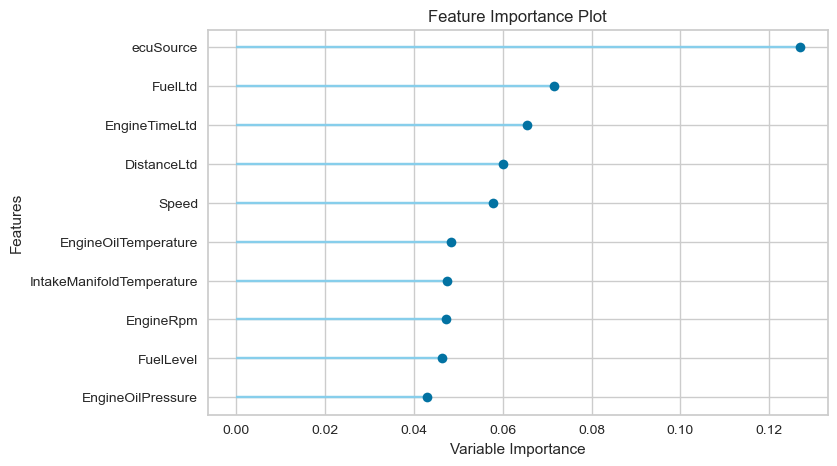

In [73]:
from pycaret.classification import *

# create time series split
split = int(len(ml_features)*0.8)
train_data = ml_features[:split]
test_data = ml_features[split:]

# setup pycaret
clf = setup(data=train_data, target='target', session_id=123, fold_strategy='timeseries')

# train model
#model = create_model('gbc')
best_model = compare_models()
#models_to_exclude = ['lightgbm']

#model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(best_model, plot='feature')

In [ ]:
evaluate_model(model)

In [ ]:
filtered_df.columns

In [ ]:
variables = ['AcceleratorPedal',
       'BarometricPressure', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'Speed',
       'Throttle', 'TurboBoostPressure']
X = filtered_df[variables]
y = filtered_df['target']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

pipe = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression())
    ]
)
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# grouped count of events
filtered_spn.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False)

In [ ]:
fault_diag_filtered.groupby(['EquipmentID', 'spn', 'fmi'])['spn','fmi'].count()

In [ ]:
fault_diag_filtered['EventTimeStamp'].dt.year.unique()

In [ ]:
fault_diag_filtered['EventTimeStamp'].dt.year.value_counts()

In [ ]:
counts = fault_diag_filtered['EventTimeStamp'].dt.year.value_counts()

# Define x and y axes
x = counts.index
y = counts.values

sizes = counts.values * 50

fig = px.scatter(x = x, y= y, size= sizes)
fig.show()

In [ ]:
fig = px.scatter(x = , y="lifeExp",       size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

In [ ]:
fault_diag_filtered[fault_diag_filtered['spn'] == 5246].groupby('EventTimeStamp').

In [ ]:
for col in fault_diag_filtered[colstoconvert]:
    fault_diag_filtered[col].plot.hist()
    plt.title(col)
    plt.show()
    
colstoconvert = fault_diag_filterd['AcceleratorPedal']